# Multi-class classification of MNIST using Perceptron

In [53]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%run utils.ipynb

import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
import math
import gif
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the seed to ensure reproducibility of experiments
np.random.seed(11)
# One-hot encoding of target label, Y
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

# Loading digits datasets
digits = datasets.load_digits()

# One-hot encoding of target label, Y
Y = digits.target
Y = one_hot(Y)

# Adding column of ones to absorb bias b of the hyperplane into X
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [3]:
# Train-val-test data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)
weights = np.zeros((X_train.shape[1],Y_train.shape[1]))

print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

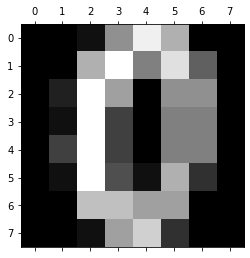

In [4]:
sns.reset_orig();

plt.gray()
plt.matshow(digits.images[10])
plt.show();

In [6]:
#Defining a Linear Perceptron for multiclass classification

def Perceptron(weights,X_train,Y_train,epochs = 100,learning_rate = 0.01):
    for i in range(epochs):       
        m = 0                       #no. of misclassified samples
        for x,y in zip(X_train,Y_train): 
            if np.dot(weights.T,x)[0]>=0:
                y_cap=1
            else:
                y_cap=-1
                                            
            if y*y_cap <0:        
                summation = weights.T + y*x
                weights = summation.T         
                m = 1                   
        if m==0:
            break                  
    return weights

In [74]:
#Calculating weights for all 10 classes of Y

for i in range(Y_train.shape[1]):
    w = Perceptron(np.zeros((X_train.shape[1],1)) ,X_train,Y_train[:,i]) 
    weights[:,i] = w[:,0]                       


(1257, 10)

In [80]:
#Printing out accuracies of training, validation and test dataset

training_accuracy, evaluation = get_prediction(X_train, Y_train, weights, get_acc=True)
print("Training Accuracy is " + str(round(training_accuracy)))

validation_accuracy, evaluation = get_prediction(X_val, Y_val, weights, get_acc=True)
print("Validation Accuracy is " + str(round(validation_accuracy)))

testing_accuracy, evaluation = get_prediction(X_test, Y_test, weights, get_acc=True)
print("Test Accuracy is " + str(round(testing_accuracy)))


Training Accuracy is 97
Validation Accuracy is 95
Test Accuracy is 94
